# Examples for Querying our API

Refer to the endpoint documentation in our `README` or to the definitions in `curvemetrics/app/app.py`.

In [7]:
import requests as req
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
URL = "http://172.104.8.91/"

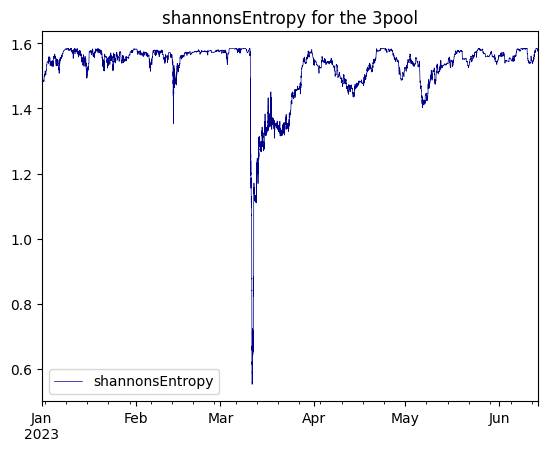

In [14]:
# NOTE: Pool Metrics
endpoint = 'pool_metrics'
pool = '0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7'
metric = 'shannonsEntropy'
start = int(datetime.timestamp(datetime(2023, 1, 1)))
end = int(datetime.timestamp(datetime.now()))
params = {
    'pool_id': pool,
    'metric': metric,
    'start': start,
    'end': end
}
response = req.get(URL + endpoint, params=params)
if response.status_code == 200:
    series = pd.DataFrame.from_dict(response.json(), orient='index', columns=[metric])
    series.index = pd.to_datetime(pd.to_numeric(series.index), unit='s')
    series.plot(color='darkblue', linewidth=0.5, title=f'{metric} for the 3pool')
    plt.show()
else:
    print('Request failed.')

In [6]:
# NOTE: Changepoint detected at 9pm UTC on March 10th, 2023
series.loc['2023-03-10'].resample('1h').last()

,shannonsEntropy
2023-03-10 00:00:00,1.573816
2023-03-10 01:00:00,1.573686
2023-03-10 02:00:00,1.573629
2023-03-10 03:00:00,1.573789
2023-03-10 04:00:00,1.575286
2023-03-10 05:00:00,1.576809
2023-03-10 06:00:00,1.578545
2023-03-10 07:00:00,1.578764
2023-03-10 08:00:00,1.579615
2023-03-10 09:00:00,1.580211


In [46]:
# NOTE: Takers
endpoint = 'takers'
response = req.get(URL + endpoint)
if response.status_code == 200:
    takers = pd.DataFrame.from_dict(response.json())
    display(takers.head())
else:
    print('Request failed.')

,amountBought,amountSold,count,cumulativeMarkout,meanMarkout,windowSize
0,5.064775e+07,5.045182e+07,55.0,1.720375e+07,312795.532169,86400
1,1.817948e+09,1.849345e+09,8162.0,1.695915e+07,2077.817564,86400
2,3.688397e+09,3.683146e+09,16809.0,1.293697e+07,769.645622,86400
3,6.762094e+08,6.843936e+08,1637.0,1.143750e+07,6986.866421,86400
4,4.954012e+08,4.954053e+08,1905.0,8.380981e+06,4399.465348,86400
